In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [106]:
# Voorbeeld van hoe je de functie kunt aanroepen
directory = "../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent"
result = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [107]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result:
    merged_df = result['merged_df']
    # Gebruik merged_df zoals je wilt
    display(merged_df)
else:
    print("De data is nog niet geladen.")

,Datalogger port_x,"Dataloggertijd, in s_x",Cycle count,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Data in balancers [Case H2a solution -> (000000000000),...,CRC errors detected (0),Unknown packets (0),Number of times more or fewer fields than expected in a packet (0),gps long,gps lat,gps direction,gps speed,gps time,Datalogger port_y,Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:20,9.0,139.7875,32.061,41827.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,140.7872,33.061,41828.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,141.8034,34.077,41829.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,142.7867,35.060,41830.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:24,9.0,143.7927,36.067,41831.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 15:05:42,9.0,54342.0287,54242.418,192149.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:43,9.0,54343.0665,54243.461,192150.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:44,9.0,54344.0703,54244.461,192151.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
merged_df

,Datalogger port_x,"Dataloggertijd, in s_x",Cycle count,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Richting van de snelheid,Datum,Data in balancers [Case H2a solution -> (000000000000),...,CRC errors detected (0),Unknown packets (0),Number of times more or fewer fields than expected in a packet (0),gps long,gps lat,gps direction,gps speed,gps time,Datalogger port_y,Format header (>20|02)
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:20,9.0,139.7875,32.061,41827.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:21,9.0,140.7872,33.061,41828.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:22,9.0,141.8034,34.077,41829.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:23,9.0,142.7867,35.060,41830.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 00:02:24,9.0,143.7927,36.067,41831.0,0.0000,0.000,0.0,0.0,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 15:05:42,9.0,54342.0287,54242.418,192149.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:43,9.0,54343.0665,54243.461,192150.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0 days 15:05:44,9.0,54344.0703,54244.461,192151.0,5151.4518,552.208,0.0,277.9,140724.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Convert 'Latitude' and 'Longitude' to numeric, setting errors='coerce' to convert non-numeric values to NaN
merged_df['Latitude'] = pd.to_numeric(merged_df['Latitude'], errors='coerce')
merged_df['Longitude'] = pd.to_numeric(merged_df['Longitude'], errors='coerce')
merged_df['Snelheid over de grond in km/h'] = pd.to_numeric(merged_df['Snelheid over de grond in km/h'],
                                                            errors='coerce')
#merged_df['Discharge 1 stroom'] = pd.to_numeric(merged_df['Discharge 1 stroom'], errors='coerce')
#merged_df['Discharge 1 spanning'] = pd.to_numeric(merged_df['Discharge 1 spanning'], errors='coerce')

# Filter out rows where 'Latitude' or 'Longitude' is NaN
merged_df = merged_df.dropna(subset=['Latitude', 'Longitude'])

# Filter rows where 'Latitude' is between 4300 and 4400 and 'Longitude' is between 700 and 800
filtered_df = merged_df[(merged_df['Latitude'] >= 4300) &
                        (merged_df['Latitude'] <= 4400) &
                        (merged_df['Longitude'] >= 700) &
                        (merged_df['Longitude'] <= 800) &
                        (merged_df['Snelheid over de grond in km/h'] >= 0) &
                        (merged_df['Snelheid over de grond in km/h'] <= 50)]
filtered_df

,Datalogger port_x,"Dataloggertijd, in s_x",Cycle count,Tijd,Latitude,Longitude,Snelheid over de grond in km/h,Datum,Magnetische directie,Data in balancers [Case H2a solution -> (000000000000),...,Unknown packets (0),Number of times more or fewer fields than expected in a packet (0),gps long,gps lat,gps direction,gps speed,gps time,Datalogger port_y,Format header (>20|02),VESC driver temperature (Celsius)
Indextijd,,,,,,,,,,,,,,,,,,,,,


In [109]:
#display all usful columns form filtered_df
data = merged_df[['Latitude', 
'Longitude', 
'Snelheid over de grond in km/h',
'VESC input current (A)',
                  "Snelheid tenopzichte van het water in Kilometers per uur",

'VESC input voltage (V)',]].copy()

data["VESC input vermogen (W)"] = data['VESC input current (A)']*data['VESC input voltage (V)']
data["Acceleratie boot tov grond"] = data["Snelheid over de grond in km/h"].diff()
data["Acceleratie boot tov water"] = data["Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [119]:
data = data[data["VESC input vermogen (W)"] > 0]
data = data[data["VESC input vermogen (W)"] < 4000]
#data = data[data["Snelheid over de grond in km/h"] > 0]
#data = data[data["Acceleratie boot tov grond"] < 0.01]
#data = data[data["Acceleratie boot tov grond"] > -0.01]
data = data[data["Acceleratie boot tov water"] < 0.01]
data = data[data["Acceleratie boot tov water"] > -0.01]

In [120]:
data

,Latitude,Longitude,Snelheid over de grond in km/h,VESC input current (A),Snelheid tenopzichte van het water in Kilometers per uur,VESC input voltage (V),VESC input vermogen (W),Acceleratie boot tov grond,Acceleratie boot tov water
Indextijd,,,,,,,,,
0 days 03:38:49,5110.7017,552.5614,0.0,0.226000,0.00,30.25,6.83650,0.0,0.0
0 days 03:38:50,5110.7017,552.5614,0.0,3.289000,0.00,30.22,99.39358,0.0,0.0
0 days 03:38:51,5110.7017,552.5614,0.0,3.474000,0.00,30.18,104.84532,0.0,0.0
0 days 03:38:52,5110.7017,552.5614,0.0,3.471000,0.00,30.19,104.78949,0.0,0.0
0 days 03:38:53,5110.7017,552.5614,0.0,2.074000,0.00,30.24,62.71776,0.0,0.0
...,...,...,...,...,...,...,...,...,...
0 days 14:52:34,5151.3925,552.1163,6.1,1.245556,7.67,29.70,36.99300,0.2,0.0
0 days 14:52:35,5151.3935,552.1181,5.2,17.432000,7.67,29.19,508.84008,-0.9,0.0
0 days 14:52:36,5151.3939,552.1192,6.5,23.848000,7.67,29.08,693.49984,1.3,0.0


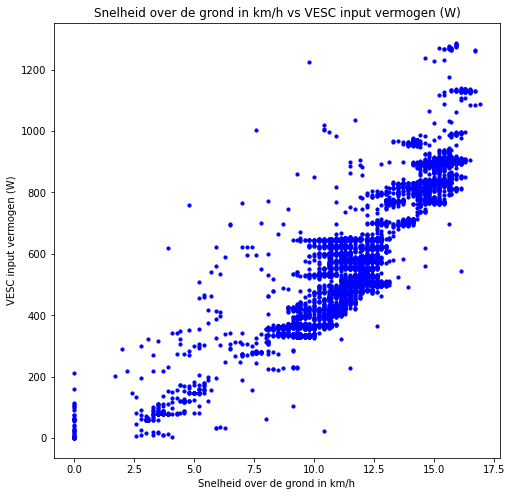

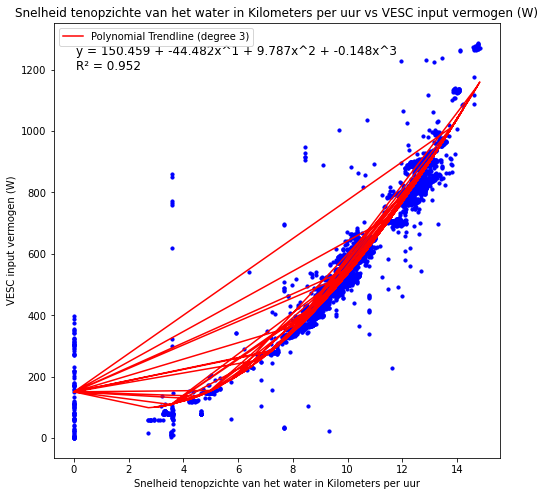

In [123]:
lib.plot_data(data,'Snelheid over de grond in km/h',"VESC input vermogen (W)")
lib.plot_data(data, 'Snelheid tenopzichte van het water in Kilometers per uur', "VESC input vermogen (W)", trendline="polynomial",degree=3)
#lib.plot_data(data,'Snelheid over de grond in km/h',"VESC input vermogen (W)",trendline="polynomial",degree=2)

In [79]:
# Example usage with the new dataset
data_new = data.copy()

data_new = lib.calculate_distance_from_speed(data_new)
data_new = lib.calculate_distance_from_gps(data_new)
data_new = lib.calculate_total_energy_MPPTS(data_new)

In [83]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    # Calculate total energy available (accu + solar)
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [84]:
def bereken_snelheden(df, kolom_wattage, massa=500, eta=0.7, rho_water=1000, Cd_water=0.7, A_water=3, rho_lucht=1.225, Cd_lucht=1.0, A_lucht=1.5, dt=0.1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'snelheid' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = 0.1  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.at[i, kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['snelheid'] = snelheden
    return df

# Voorbeeld gebruik:
# df = pd.DataFrame({'tijd': np.arange(0, 300, 0.1), 'vermogen': [100]*1000 + [200]*1000 + [0]*1000})
# df = bereken_snelheden(df, 'vermogen')
# print(df)

In [87]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')

KeyError: 1

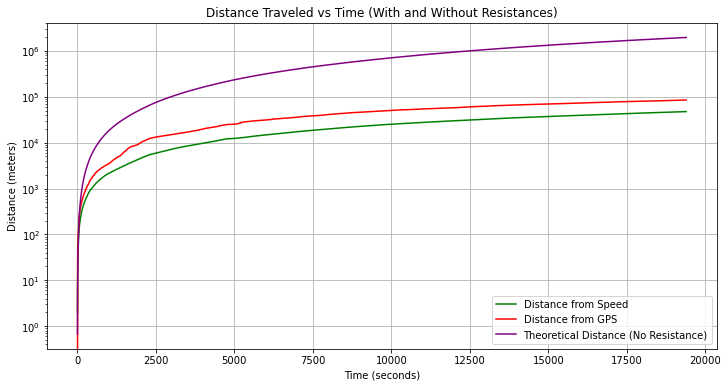

In [88]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_new